In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json      # library for working with JSON-formatted text strings
import pprint as pp    # library for cleanly printing Python data structures
import seaborn as sns
from datetime import datetime

This notebook loads in the Philadelphia Twitter Data from twitterscraper. We searched only for "climate change." The selected Twitter accounts are below; however several did not have any tweets that mention climate change. We selected Philadelphia because it has not declared a climate emergency. Additionally, given how little climate change is tweeted about, we decided to scrape all tweets (no matter the timeframe).   

https://github.com/taspinar/twitterscraper/blob/master/README.rst

**@PhiladelphiaGov**
twitterscraper "climate change from:PhiladelphiaGov" --lang eng -o phila_gov_tweets.json

**@SEPTA (0 Tweets)**
twitterscraper "climate change from:SEPTA" --lang eng -o phila_sep_tweets.json

**@PhilaParkandRec** 
twitterscraper "climate change from:PhilaParkandRec" --lang eng -o phila_park_tweets.json

**@PhilaHsgAuthPHA (0 Tweets)**
twitterscraper "climate change from:PhilaHsgAuthPHA" --lang eng -o PhilaHsgAuthPHA.json

**@PhilaOEM (0 Tweets)**
twitterscraper "climate change from:PhilaOEM" --lang eng -o phila_oem.json


In [3]:
def json_to_df_tweets (csv_file):
    with open(csv_file) as f:
      data = json.load(f)
    
    d = {'username': [x['username'] for x in data],
        'time': [x['timestamp'] for x in data],
        'tweet': [x['text'] for x in data],
        'likes': [x['likes'] for x in data],
        'replies': [x['replies'] for x in data]
        }
    
    df_Test = pd.DataFrame.from_dict(d)
    
    return df_Test

In [4]:
#The files are obtained using twitterscraper; only two agencies actually tweeted "climate change"
philadelphiagov_tweets = json_to_df_tweets ('phila_gov_tweets.json')
philapark_tweets = json_to_df_tweets ('phila_park_tweets.json')

In [5]:
def combine_dataframe (df1, df2): #this function puts all the dataframes into one using .append()
    d1 = df1.append(df2)
    return d1.drop_duplicates(subset='tweet', keep="first") #the scraper picked up retweets, this rectifies that

In [6]:
phila_tweets = combine_dataframe(philadelphiagov_tweets, philapark_tweets) 
phila_tweets

,username,time,tweet,likes,replies
0,City of Philadelphia,2015-08-25T17:02:57,"Philadelphia, Los Angeles, Houston Mayors laun...",0,0
2,City of Philadelphia,2016-12-07T17:30:17,ICYMI: @PhillyMayor joined an open letter urgi...,5,1
4,City of Philadelphia,2014-02-05T21:34:18,Mayor Nutter has been in South Africa this wee...,2,0
5,City of Philadelphia,2014-02-05T15:06:11,"Mayor @Michael_Nutter at @c40cities, ""Climate ...",2,1
8,City of Philadelphia,2018-10-30T15:00:49,"""Philadelphia has been announced as a winner o...",21,2
9,City of Philadelphia,2018-10-22T22:00:39,How is action on climate change and sustainabi...,5,0
12,City of Philadelphia,2018-08-31T19:46:41,Philly is the cradle of liberty. We’re staying...,5,0
13,City of Philadelphia,2018-08-16T18:30:11,"Did you know that Philadelphia hosts content, ...",24,1
14,City of Philadelphia,2018-08-06T23:30:05,Climate change is real. We're getting more rai...,245,15
18,City of Philadelphia,2018-01-09T19:00:15,Climate change is real. Philadelphia has commi...,28,1


These are all the tweets that mention climate change from Philadelphia. 

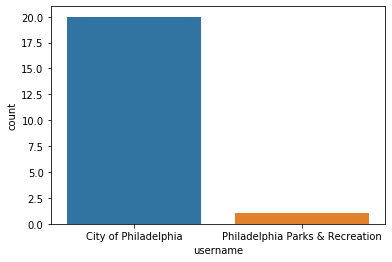

In [7]:
ax = sns.countplot(x='username', data=phila_tweets)
plt.show()

In [8]:
for x in phila_tweets['time']:
    print (datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")) #'%Y-%m-%dT%H::%M::%S.%f'))

2015-08-25 17:02:57
2016-12-07 17:30:17
2014-02-05 21:34:18
2014-02-05 15:06:11
2018-10-30 15:00:49
2018-10-22 22:00:39
2018-08-31 19:46:41
2018-08-16 18:30:11
2018-08-06 23:30:05
2018-01-09 19:00:15
2017-12-20 17:00:56
2017-07-06 19:30:10
2017-06-28 14:25:16
2017-06-01 20:39:10
2019-12-31 15:25:03
2019-10-26 21:10:05
2019-10-23 15:30:29
2019-10-15 17:35:05
2019-10-10 23:00:33
2019-10-08 15:15:07
2016-07-12 16:15:14


In [9]:
# Generate result using pandas 
date = [] 
for x in phila_tweets['time']: 
    data = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
    print(data)
    date.append(data)
    
phila_tweets["date"] = date   
phila_tweets

2015-08-25 17:02:57
2016-12-07 17:30:17
2014-02-05 21:34:18
2014-02-05 15:06:11
2018-10-30 15:00:49
2018-10-22 22:00:39
2018-08-31 19:46:41
2018-08-16 18:30:11
2018-08-06 23:30:05
2018-01-09 19:00:15
2017-12-20 17:00:56
2017-07-06 19:30:10
2017-06-28 14:25:16
2017-06-01 20:39:10
2019-12-31 15:25:03
2019-10-26 21:10:05
2019-10-23 15:30:29
2019-10-15 17:35:05
2019-10-10 23:00:33
2019-10-08 15:15:07
2016-07-12 16:15:14


,username,time,tweet,likes,replies,date
0,City of Philadelphia,2015-08-25T17:02:57,"Philadelphia, Los Angeles, Houston Mayors laun...",0,0,2015-08-25 17:02:57
2,City of Philadelphia,2016-12-07T17:30:17,ICYMI: @PhillyMayor joined an open letter urgi...,5,1,2016-12-07 17:30:17
4,City of Philadelphia,2014-02-05T21:34:18,Mayor Nutter has been in South Africa this wee...,2,0,2014-02-05 21:34:18
5,City of Philadelphia,2014-02-05T15:06:11,"Mayor @Michael_Nutter at @c40cities, ""Climate ...",2,1,2014-02-05 15:06:11
8,City of Philadelphia,2018-10-30T15:00:49,"""Philadelphia has been announced as a winner o...",21,2,2018-10-30 15:00:49
9,City of Philadelphia,2018-10-22T22:00:39,How is action on climate change and sustainabi...,5,0,2018-10-22 22:00:39
12,City of Philadelphia,2018-08-31T19:46:41,Philly is the cradle of liberty. We’re staying...,5,0,2018-08-31 19:46:41
13,City of Philadelphia,2018-08-16T18:30:11,"Did you know that Philadelphia hosts content, ...",24,1,2018-08-16 18:30:11
14,City of Philadelphia,2018-08-06T23:30:05,Climate change is real. We're getting more rai...,245,15,2018-08-06 23:30:05
18,City of Philadelphia,2018-01-09T19:00:15,Climate change is real. Philadelphia has commi...,28,1,2018-01-09 19:00:15


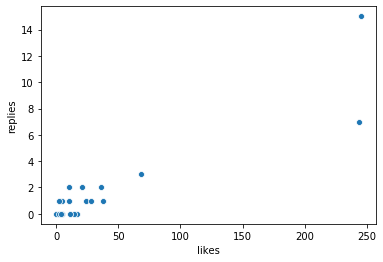

In [10]:
ax = sns.scatterplot(x="likes", y="replies", data=phila_tweets)

In [11]:
import plotly.express as px

In [15]:
fig = px.scatter(phila_tweets, x='date', color='username')
fig.show()